In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
wine = pd.read_csv('winequality-both.csv', sep=',', header=0)

In [3]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* 알아야 할 열 정보  
    * type: 와인품종  
    * fixed acidity ~ alcohol: 와인의 특성  
    * quality: 와인품질

### 열이름 전처리

In [4]:
wine.columns = wine.columns.str.replace(' ', '_')

In [5]:
wine.shape

(6497, 13)

In [6]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 특정 열의 유일값 찾기

### quality: 선형 통계 모델에서 예측 하고자 하는 선형값

In [7]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [8]:
sorted(wine.quality.unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [9]:
sorted(wine.type.unique())

['red', 'white']

### 빈도찾기

In [10]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

---

### 와인 종류에 따른 기술통계를 출력하기 

In [11]:
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
6492    11.2
6493     9.6
6494     9.4
6495    12.8
6496    11.8
Name: alcohol, Length: 6497, dtype: float64

In [12]:
wine.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine.groupby('type')[['alcohol']].describe()

alcohol                                                 
        count       mean       std  min  25%   50%   75%   max
type                                                          
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2

### 특정 사분위수 값 확인

In [14]:
wine.groupby('type')[['quality']].quantile([0.2, 0.8])

quality
type              
red   0.2      5.0
      0.8      6.0
white 0.2      5.0
      0.8      7.0

In [15]:
red_wine = wine.loc[wine['type']=='red', 'quality']
red_wine.head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [16]:
white_wine = wine.loc[wine['type']=='white', 'quality']

C:\Users\OWNER\AppData\Local\Temp\ipykernel_11720\1973645628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine")
C:\Users\OWNER\AppData\Local\Temp\ipykernel_11720\1973645628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh

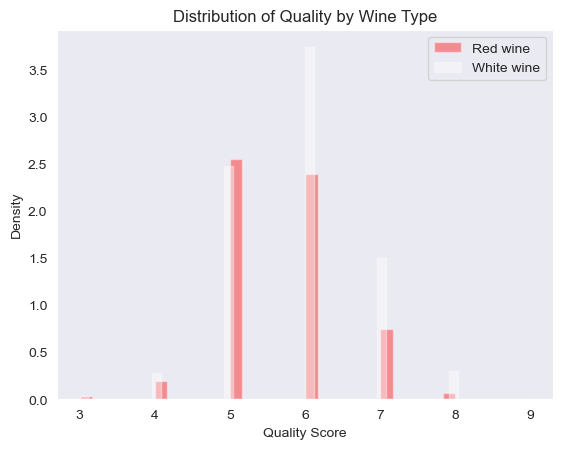

In [17]:
sns.set_style("dark")
sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine")
sns.distplot(white_wine, norm_hist=True, kde=False, color="white", label="White wine")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

### 와인 종류에 따른 품질의 차이 검정

In [18]:
wine.groupby(['type'])[['quality']].agg(['std', 'mean'])

quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909

### 레드와인과 화이트와인은 같은 종류의 데이터셋으로 볼 수 있는가?

### t-test (T 검정)

* ttest_ind의 반환값:t-statistic, p-value, df
    * 이 중 t-statistic은 0에 가까울 수록, df는 큰 값일 수록 신뢰도가 올라가나 절대적인 기준이 없다.
    * p-value는 0.05값을 기준으로 가설을 검증하는 용도로 활용된다.

In [19]:
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)

In [20]:
tstat,df

(np.float64(-9.685649554187696), np.float64(6495.0))

In [21]:
pvalue

np.float64(4.888069044201508e-22)

In [22]:
print('p-value: %.4f' %  pvalue)

p-value: 0.0000


### pvalue: 유의확률 (통계값을 얼마나 신뢰할 수 있는가를 나타내는 지표)

### pvalue 해석
* 통계학에서 0.05를 기준으로 해석
* 샘플 크기에 따라 통계값을 신뢰할 수 있는지에 대한 유용한 지표로 활용
* 0.05보다 작은 경우
    * 귀무가설(H0, Null Hypothesis / 두 표본과의 차이가 없다)를 기각할 수 있다.
    * 대립가설(H1 또는 Ha, Alternative Hypothesis /두 표본과의 차이가 있다)를 받아들인다.

* 단순히 정리
    * p-value < 0.05 : 두 표본 차이가 있다. (귀무가설 기각, 대립가설 채택)
    * p-value > 0.05 : 두 표본 차이가 없다. (귀무가설 채택, 대립가설 기각)

### T-test 실습

* 아래 예제에서 loc, 샘플수(size)를 변경하면서 가설 검정의 결과가 어떻게 바뀌는지 확인해 보세요.
    * t-test1 => G1(loc: 50, size: 10000),  G2(loc: 55, size: 10000)
    * t-test2 => G1(loc: 54, size: 10000),  G2(loc: 55, size: 10000)
    * t-test3 => G1(loc: 54.9, size: 10000),  G2(loc: 55, size: 10000)
    * t-test4 => G1(loc: 54.8, size: 10000),  G2(loc: 55, size: 10000)
    * t-test5 => G1(loc: 54.9, size: 10000),  G2(loc: 55, size: 1)

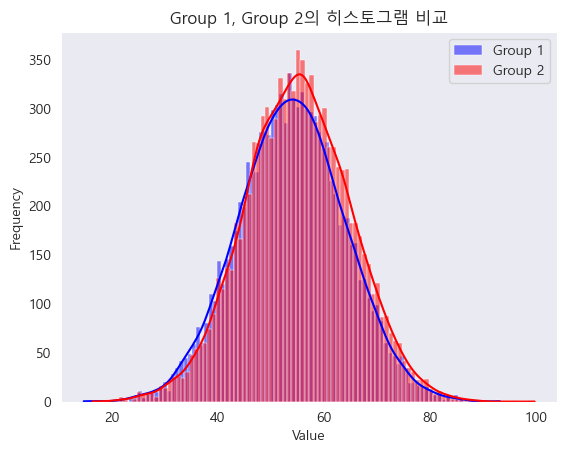

In [26]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# 가상의 데이터셋 생성
np.random.seed(42)

# 두 개의 그룹을 위한 데이터 생성
# t-test는 평균을 중심으로 유의미한 차이를 검증하는데 포커스되어 있다.
# t-test1
# group1 = np.random.normal(loc=50, scale=10, size=10000)  # 평균: 50, 표준편차: 10, 샘플 크기: 10000
# group2 = np.random.normal(loc=55, scale=10, size=10000)  # 평균: 55, 표준편차: 10, 샘플 크기: 10000

# t-test2
group1 = np.random.normal(loc=54, scale=10, size=10000)  # 평균: 54, 표준편차: 10, 샘플 크기: 10000
group2 = np.random.normal(loc=55, scale=10, size=10000)  # 평균: 55, 표준편차: 10, 샘플 크기: 10000

# t-test3
# group1 = np.random.normal(loc=54.9, scale=10, size=10000)  # 평균: 54.9, 표준편차: 10, 샘플 크기: 10000
# group2 = np.random.normal(loc=55, scale=10, size=10000)  # 평균: 55, 표준편차: 10, 샘플 크기: 10000

# t-test4
# t-test는 평균값을 기준으로 검증하기 때문에 아래와 같이 분산값을 크게하여 데이터 분포가 다르게 보이는 데이터도
# 유사하다고 판단할 수 있다. 아래와 같은 데이터 셋은 히스토그램 분석후 회의를 거쳐 추가 논의할 수 있다.
# group1 = np.random.normal(loc=54.9, scale=10, size=10000)  # 평균: 54.9, 표준편차: 10, 샘플 크기: 10000
# group2 = np.random.normal(loc=55, scale=100, size=10000)  # 평균: 55, 표준편차: 100, 샘플 크기: 10000

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 히스토그램 그리기
sns.histplot(group1, bins=100, color='blue', label='Group 1', kde=True)
sns.histplot(group2, bins=100, color='red', label='Group 2', kde=True)

# 결과 출력
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Group 1, Group 2의 히스토그램 비교')
plt.show()

In [27]:
# t-test 수행
t_statistic, p_value = ttest_ind(group1, group2)

# 결과 출력
print("Group 1 평균:", np.mean(group1))
print("Group 2 평균:", np.mean(group2))
print("t-statistic:", t_statistic)
print('p-value: %.4f' %  p_value)
# print("p-value:", p_value)

# 유의 수준 0.05로 가정하고 귀무 가설 기각 여부 판단
alpha = 0.05
if p_value < alpha:
    print("귀무 가설을 기각합니다. 두 그룹 간에는 통계적으로 유의미한 차이가 있습니다.")
#     print("대립 가설을 받아들입니다. 두 그룹 간에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무 가설을 받아들입니다. 두 그룹 간에는 통계적으로 유의미한 차이가 없습니다.")
#     print("대립 가설을 기각합니다. 두 그룹 간에는 통계적으로 유의미한 차이가 있습니다.")

Group 1 평균: 53.97864016631574
Group 2 평균: 55.135340530648875
t-statistic: -8.160850353577969
p-value: 0.0000
귀무 가설을 기각합니다. 두 그룹 간에는 통계적으로 유의미한 차이가 있습니다.


### 실데이터로 t-test

In [29]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# iris 데이터셋 로드 (Seaborn 라이브러리에 기본으로 포함된 데이터셋)
iris = sns.load_dataset('iris')

In [30]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 문제]
* sepal_length 열의 값중 품종이 setosa와 versicolor인 것을 2개의 그룹으로 나누어서 데이터가 차이가 있는지 검증해 보세요
* sepal_width, petal_length, petal_width 값도 같은 방식으로 검증해 보세요

In [31]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
sepal_length = iris['sepal_length']
# sepal_length = iris['petal_width']

# 두 개의 그룹으로 나누기 (species: setosa, versicolor)
group1 = sepal_length[iris['species'] == 'setosa']
group2 = sepal_length[iris['species'] == 'versicolor']

# 두 집단 간의 평균 차이 검정 (독립표본 t-test)
_, p_value, _ = sm.stats.ttest_ind(group1, group2) # _ dummy(활용하지 않는) 변수 

# 결과 출력
print("독립표본 t-test 결과:")
# print("p-value:", p_value)
print('p-value: %.4f' %  p_value)

# 유의 수준 0.05로 가정하고 귀무 가설 기각 여부 판단
alpha = 0.05
if p_value < alpha:
    print("귀무 가설을 기각합니다. 두 그룹 간에는 평균이 다른 유의미한 차이가 있습니다.")
else:
    print("귀무 가설을 기각하지 않습니다. 두 그룹 간에는 평균이 같은 유의미한 차이가 없습니다.")

독립표본 t-test 결과:
p-value: 0.0000
귀무 가설을 기각합니다. 두 그룹 간에는 평균이 다른 유의미한 차이가 있습니다.


* 연습
    * setosa, virginica 의 sepal_length 데이터가 유사한지 검증하세요.
    * versicolor, virginica 의 sepal_length 데이터가 유사한지 검증하세요.
    * sepal_width, petal_length, petal_width 열도 setosa, virginica, versicolor 품종 2개를 조합하여 t-test 검증
    * 검증후 히스토그램으로 이상유무 확인

# 결과 활용방안

* 의사결정  
    * 두 데이터 셋에 대하여 분리하여 분석 (선형회귀 예측, 성능, 차이점등)  
* 추가 연구 방향 설정  
    * 예측 결과와 틀릴 경우 데이터 셋 검증
    * 원인 분석  